# Fake News Detection Using Support Vector Machines (SVMs)
### Advanced Machine Learning (Project 1)
**Authors:** Otari Samadashvili and Nana Jaoshvili  
**Date:** 08.12.2025.

---

## Introduction

### Project Objective

This project aims to distinguish **Real News** from **Fake News** in an era of overwhelming and chaotic media coverage. The analysis applies **Support Vector Machine (SVM) methods** to classify news articles based on their linguistic and semantic patterns. The objective is to compare the performance of multiple SVM options, including linear, polynomial, and RBF kernels, and identify the most effective one for reliable fake-news detection. 


**The working hypothesis** is that the linear kernel may perform similarly to more complex kernels while requiring fewer computational resources. Comparing these options theoretically and in practice, will reveal the most computationally efficient and accurate SVM method for real‑world fake‑news classification.



### Context & Motivation

**The central problem** addressed in this project is the growing difficulty of verifying online information in real time. Traditional fact‑checking cannot keep up with the speed at which misinformation spreads, and fake news often imitates the tone, structure, and style of legitimate journalism, making it difficult to distinguish truth from fabrication.  

Misinformation can affect society in various economic and political ways:
- **Influence democratic processes**
- **Disrupt financial markets**
- **Undermine public access to credible information**

Automated systems that flag suspicious content serve as a crucial first filter, directing human attention toward articles that require deeper review, rather than replacing human judgment entirely. Machine learning provides a practical way to address this challenge by learning patterns in text that are too subtle or complex for manual screening. Among available methods, SVMs remain widely used for text classification because of their robustness, solid theoretical foundations, and ability to handle high‑dimensional feature spaces derived from word frequencies and semantic representations.


**The motivation** behind this project is to evaluate how different SVM configurations perform when applied to the classification of real and fake news articles. By comparing linear, polynomial, and radial basis function (RBF) kernels, the study aims to understand how kernel choice influences detection accuracy. Beyond identifying the best-performing model, the project highlights the importance of computational efficiency in promoting media literacy and strengthening resilience against misinformation. 

This notebook documents the end-to-end workflow from data preparation and feature extraction to model evaluation providing a simple framework for fake-news detection.


### Motivation for the Chosen Method:

Support Vector Machines (SVMs) are used as the primary method of analysis in this project. SVMs are a natural choice for this setting because news articles, when vectorized with TF–IDF, yield high-dimensional sparse feature spaces where linear decision boundaries often achieve strong separation. By comparing linear and RBF kernels, the project investigates whether the fake vs real boundary is effectively linear and how much reported “near-perfect” accuracy is driven by leakage cues rather than genuine linguistic understanding.

SVMs offer several practical advantages that make them a strong fit for fake-news classification:

- **Effective in High-Dimensional Spaces**: Text data represented through TF-IDF or similar methods produces thousands of features. SVMs are  designed to work well in such spaces by maximizing the margin between classes, helping them avoid the typical issues associated with high dimensionality.

- **Computational Efficiency**: Deep learning models require significant computational resources and large labelled datasets. In contrast, linear SVMs train quickly and provide fast inference, making them suitable for systems that need fast predictions or operate under limited computing power.

-  **Robustness and Generalisation**: SVMs focus on identifying the optimal separating hyperplane rather than fitting individual data points. This helps them remain less prone to overfitting compared to models like decision trees, especially in noisy textual environments.

These properties make SVMs a strong methodological choice for this study, balancing theoretical robustness with practical efficiency in real-world text classification.



## Literature Review
**["A benchmark study of machine learning models for online fake news detection"](https://www.sciencedirect.com/science/article/pii/S266682702100013X)**  
<span style="color:gray; font-style:italic">Khan J.Y., Khondaker T.I., et al., Machine Learning with Applications, 2021
</span>  
- Empirical studies Show that false content can spread faster and further than truthful information on social platforms, increasing the **societal risks of misinformation**. 
- Highlights that duplicated content, shared templates, and dataset‑specific markers (e.g. source names) can cause severe **data leakage** and overoptimistic model performance.
- Claims that **SVMs with TF–IDF features** often outperform Naive Bayes, KNN, and basic tree‑based models on binary fake‑vs‑real tasks, frequently reaching **90–99% accuracy** on curated datasets.

**["Survey of fake news detection using machine intelligence approach"](https://www.sciencedirect.com/science/article/abs/pii/S0169023X22001094)**  
<span style="color:gray; font-style:italic">Pal A, Pranav, Prahdan M, Data & Knowledge Engineering, 2023
</span>  
- The survey shows that fake‑news systems typically rely on a strong content‑based text classifier at their core, then add user, network, or temporal features to improve robustness. This supports focusing on **SVMs with TF–IDF and stylistic features** as a solid foundation in this project.

**["Fake and Real News Dataset"](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data)**  
<span style="color:gray; font-style:italic">Clément Bisaillon, Kaggle, 2023
</span>  
- Provides a widely used **benchmark dataset** with separate files of fake and true articles containing title, text, subject, and date fields; prior analyses note that many true articles originate from Reuters with stereotyped lead phrases, creating strong lexical cues that must be removed to avoid source‑driven leakage.


**["Advanced machine learning techniques for fake news detection"](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://magnascientiapub.com/journals/msarr/sites/default/files/MSARR-2024-0198.pdf)**  
<span style="color:gray; font-style:italic">Jahan I., Hasan N., Islam S.N., et al., Magna Scientia Advanced Research and Reviews, 2024
</span>  
- Finds that simple TF–IDF combined with SVMs can match or outperform more complex pipelines for fake‑news classification when carefully tuned.
- Shows that while RBF kernels can yield small gains in some scenarios, **linear SVMs** often achieve **similar performance** with substantially **lower computational cost** when trained on TF–IDF word and n‑gram features.

## Dataset Description and Preprocessing
The analysis uses the **["Fake and Real News Dataset"](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data)** created by Clément Bisaillon on Kaggle, which is a widely used benchmark for binary fake‑vs‑real news classification. The dataset is provided in two separate CSV files, True.csv and Fake.csv, making the label structure explicit and straightforward for supervised learning.

**Articles included**:
- Total articles - **44,898**
- Real News - **21,417 (48% Real)**
- Fake News - **23,481 (52% Fake)**

The classes are balanced (52% fake and 48% real), which reduces the need for complex resampling techniques and allows standard train–test splits and evaluation metrics (accuracy, precision, recall, F1) to be interpreted without heavy class‑imbalance corrections.

**Each file contains four columns**:
- `title` - headline of the news article
- `text` - full body text of the article
- `subject` - topical category (e.g., politics, world news)
- `date` - publication date as a string

### Data Exploration & Preprocessing

Initial exploration confirmed that the dataset focuses mainly on political and world news. The distribution of subjects is skewed toward politics‑related content, which supports treating the task largely as political/world news classification rather than general news. Basic checks showed no missing values in textual fields, but revealed duplicated articles and strong lexical patterns tied to specific sources such as Reuters, indicating potential data leakage.​

To prepare the data for robust text classification, the project applies a sequence of cleaning and feature‑engineering steps to ensure that the SVM learns generalizable linguistic patterns rather than exploiting superficial artifacts in the dataset.​

##### **Data Cleaning Steps**:
1) **Map subject categories**
    - **Problem**: Subject field contained different labels for fake and real news (`politicsNews`, `worldnews`, `Government News`, `Middle-east`, etc.), creating a risk of data leakage.​ 
    - **Solution**: Subject values were mapped into two broader groups, `Politics` and `WorldNews`, collapsing related labels into a simpler, binary variable. This aggregation eliminates leakage, meaning the model will not memorize the subject labels and will generalize better.

2) **Remove leakage words and stop words**
    - **Problem**: 
        - <span style="color: black; font-weight: normal;">Source and location strings</span>: Many real articles begin with the `location` or the `source` of news, which serve as near‑perfect shortcuts for the label and create data leakage.​ (e.g. “WASHINGTON (Reuters)”)
        - <span style="color: black; font-weight: normal;">Exclusive words</span>: Some words were exclusively used in fake or real articles, creating the risk of data leakage. 
        - <span style="color: black; font-weight: normal;">Stop words</span>: common words such as articles, prepositions, and conjugations represent an issue for model generalization capabilities. 
    - **Solution**: The dataset was stripped of location–source phrases and stop words from the article text before vectorization. Without removal, an SVM can achieve artificially high accuracy by detecting the presence of “Reuters” rather than learning stylistic or semantic differences between fake and real news, significantly inflating performance estimates. `Word frequency counters` were computed separately for real and fake news, and the sets of exclusive or highly skewed terms were inspected. Inspecting vocabulary differences helps distinguish meaningful stylistic signals (e.g. sensational language) from leakage‑driven ones, guiding the cleaning process.


3) **Removing duplicate articles**
    - **Problem**: Exploration showed a non‑trivial number of duplicate articles, which would effectively leak information between training and test splits and allow models to memorize specific articles.​
    - **Solution**: Duplicates were removed, only leaving the first article by date, and the number of duplicates per class was recorded to document the `repost_count`. Doing so prevents train–test contamination, ensures that evaluation reflects generalization to unseen content, and avoids giving the model multiple identical copies of the same article. Saving number of reposts ensures we don't lose data by deleting the duplicates and save a potentially useful feature.  
    
4) **Feature Engineering** 
    - **Problem**: TF–IDF features may miss global affective patterns, even though prior work suggests that fake news often exhibits distinct emotional profiles compared to real reporting.​
    - **Solution**: External features were applied to each article **title and text separately**. Incorporating additional features allows the SVM to exploit nuanced differences in **tone, intensity, and writing style** between fake and real news, potentially improving performance and interpretability relative to text‑only baselines.

        - `capital ratio` - number of uppercase characters divided by total characters in title/text

        - `avg_sentence_length` - average number of tokens per sentence in the article

        - `exclamation_count` - number of exclamation marks, used for emotion writing style detection, which tends to be more frequent in fake news

        - `title_sentiment_subjectivity` and `title_sentiment_polarity` - sentiment scores computed by a sentiment analysis library

        - `emotion` and `emotional_score` - emotion category and emotion scores (intensity) for anger, fear, joy, trust, disgust, etc.

5) **TF-IDF vectorization**
    - **Problem**: Raw text cannot be directly used by SVMs, and simple count vectors can overemphasize frequent words while underrepresenting rarer but more informative ones.
    - **Solution**: Articles were converted into numerical features using TF–IDF vectorization, with constraints of max_features of 50,000 and ngram_range of 1-3. TF–IDF down‑weights frequent words and up‑weights rare terms, producing a high‑dimensional sparse representation for SVMs.

6) **Cyclical dates encoding**
    - **Problem**: Dates stored as raw strings or integers do not capture the cyclical nature of time, and treating them as linear values can misrepresent patterns.
    - **Solution**: date components were transformed using sin–cos encodings to map them onto a unit circle, preserving their cyclical structure. This allows the model to learn periodic patterns, such as systematic differences in content over time, without discontinuities.

7) **Scale numerical features**
    - **Problem**: Numerical features lie on different scales, it will cause some features to dominate and the effect of low-scale features will be missed in the model.
    - **Solution**: All non‑text numerical features were scaled, using standardization, and remaining categorical variables were handled via one‑hot encoding before being combined with TF–IDF vectors. This ensures that SVM regularization treats features more uniformly and that no single numeric dimension overpowers the others.

**Create final dataframe**: The cleaned features were combined into a single modelling dataframe. The dataframe is now ready for model training.

## Training SVM Models  
After constructing the final feature matrix, the dataset is randomly split into **75% training data** and **25% test data**, using stratification so that the proportion of fake and real news is preserved in both sets. This setup provides enough data to reliably train SVM models while keeping a separate hold‑out set for an unbiased estimate of generalization performance.

#### Model A: Linear SVM
A linear SVM uses a linear kernel, learning a straight hyperplane in the TF‑IDF feature space that separates fake and real news. It learns a weight for each feature and classifies articles based on the sign of the weighted sum. The decision boundary is linear and directly interpretable through feature coefficients.  
Text‑classification studies consistently show that linear SVMs with TF‑IDF are hard to beat on news datasets, so this model serves both as a competitive baseline and as a test of whether fake vs real articles are largely linearly separable in the high‑dimensional space.

**Pros**:  
- Scales well to high‑dimensional sparse TF‑IDF features
- Fast to train and to evaluate, making it ideal for repeated cross‑validation runs
- Coefficients can be inspected to see which words push predictions towards fake or real, easy qualitative analysis

**Cons**:  
- Limited to linear separations. If important non‑linear patterns exist that TF‑IDF and n‑grams do not linearize well, they may be missed.


**Hyperparameter Tuning**: Hyperparameters are optimized using Optuna, a Bayesian optimization framework that efficiently searches the parameter space. The optimization runs for 10 trials, evaluating each configuration via **5-fold CV** and selecting parameters that maximize the cross-validation F1-score.

**Parameter Space**: Best Parameter Found: C = 8.7246  
- **C**: Log-uniform distribution from 5.0 to 12.0. Controls the trade-off between margin maximization and training error. Larger values allow the model to fit the training data more closely.


##### **Linear SVC Decision score and Misclassification**
![Linear SVC.png](<attachment:Linear SVC.png>)

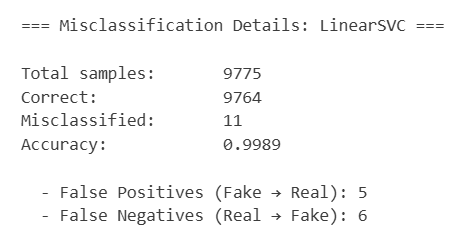  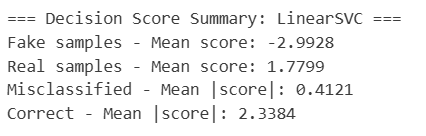
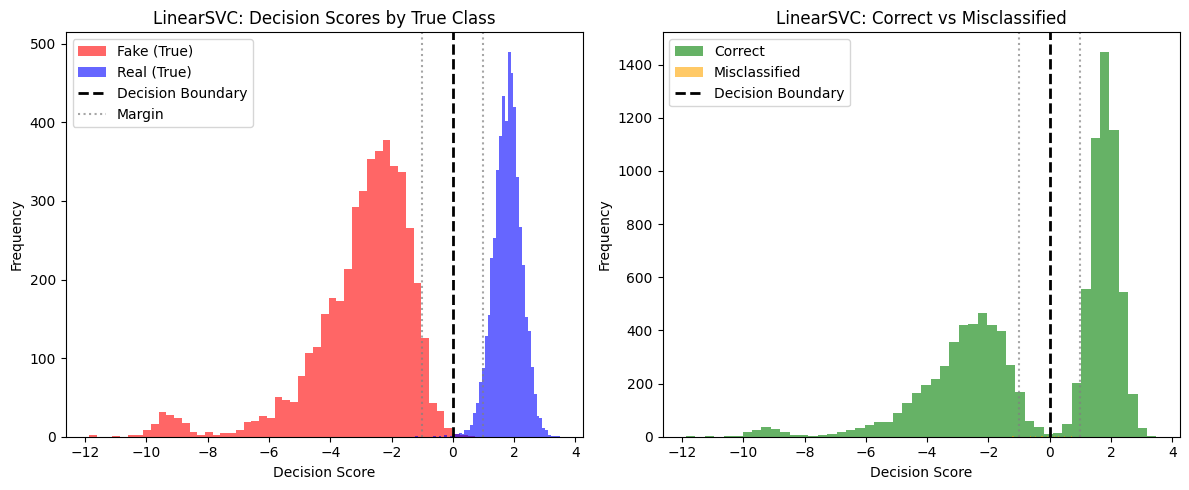

#### Model B: Polynomial
A polynomial SVM uses a polynomial kernel. Computes similarity based on polynomial combinations of TF‑IDF features, allowing the classifier to learn curved decision boundaries that depend on feature interactions (e.g. specific combinations of words or phrases).
Experimenting on a polynomial kernel will show whether modelling simple feature interactions provides measurable gains over the linear model. If accuracy does not improve meaningfully, it strengthens the case for preferring the simpler linear SVM.

**Pros**:
- Can model low‑order non‑linear relationships between words that a linear boundary might not capture.

**Cons**:
- Computationally more expensive than the linear kernel, especially with many features and cross‑validation runs.
- More sensitive to hyperparameters, which increases the risk of overfitting on this relatively structured dataset.


**Hyperparameter Tuning**: Optimized using Optuna with 3 trials (limited due to the computational expense of polynomial kernels with high-dimensional sparse features). Each trial evaluates a parameter combination via **3-fold CV**, optimizing for F1-score.

**Parameter Space**: Best Parameters Found: C = 0.2403, degree = 3, coef0 = 4.8657.  
- **C**: Log-uniform from 0.2 to 0.6
- **degree**: Integer from 3 to 4. Controls polynomial order (degree=3 captures cubic interactions between features)
- **coef0**: Uniform from 3.0 to 5.5. Independent term in the polynomial kernel function




##### **Polynomial SVC Decision score and Misclassification**
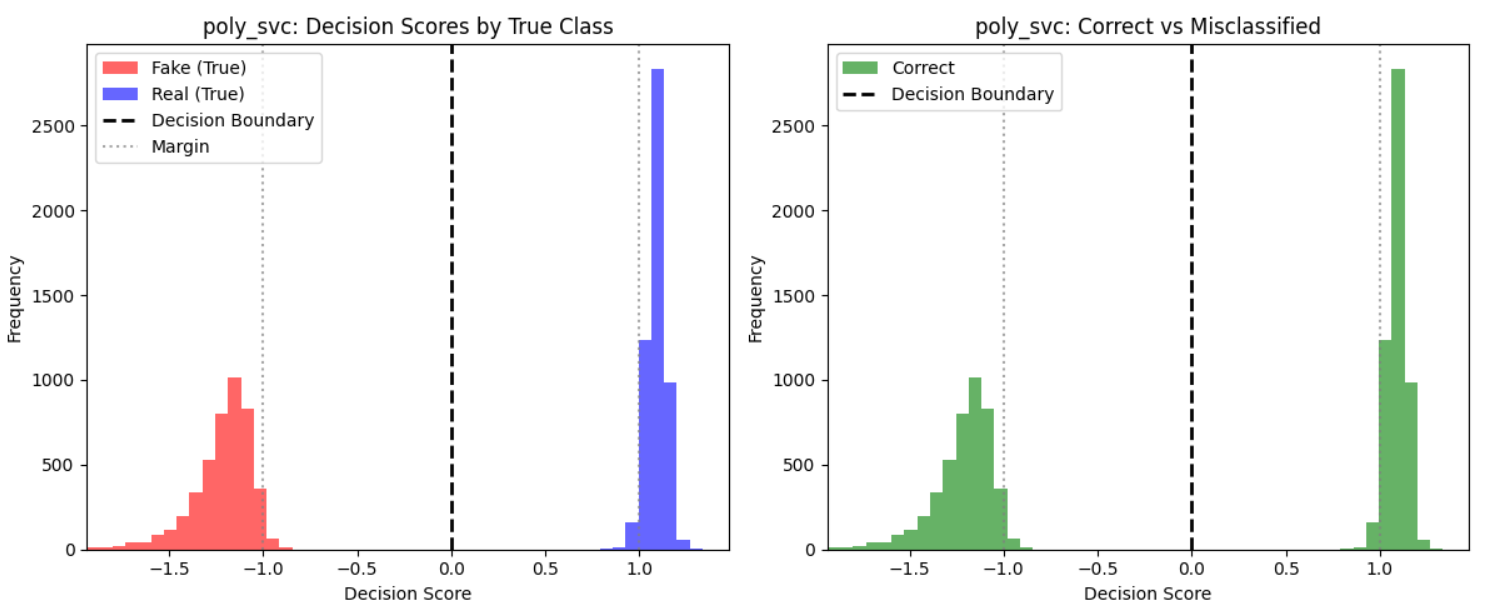
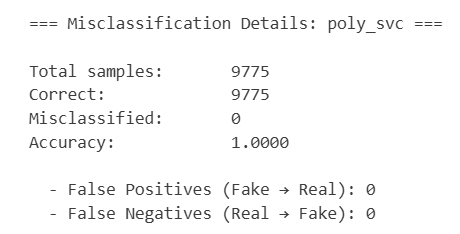
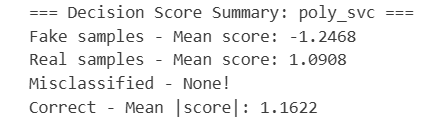

#### Model C: RBF Kernel SVM
An RBF (Radial Basis Function) SVM uses a Gaussian kernel, enabling highly flexible non‑linear decision boundaries. It measures similarity using a Gaussian function of the distance between article vectors in TF‑IDF space, and forms complex, curved boundaries around clusters of fake and real news. Its main hyperparameters C and γ.
Comparing RBF model performance with the linear and polynomial models will show if added non‑linearity provides real value for this dataset, or overcomplicates the model training giving similar results.

**Pros**:
- Flexible and capable of capturing complex non‑linear structures, which is useful if subtle patterns in word usage and emotion features separate fake from real articles.

**Cons**:
- Computationally costly compared to the linear SVM, especially in hyperparameter search.
- Easier to overfit if hyperparameters aren't tuned carefully, especially in case of noise.
- Harder to interpret, since decisions depend on similarities to support vectors rather than simple feature weights.


**Hyperparameter Tuning**: Optimized using Optuna with 2 trials (minimal due to RBF kernel's computational demands on ~34,000 training samples with ~50,000 features). **3-fold  CV** F1-score guides the search.  

**Parameter Space**: Best Parameters Found: C = 1.4429, gamma = 0.0694
- **C**: Log-uniform from 0.8 to 2.5
- **gamma** (RBF kernel width): Log-uniform from 0.04 to 0.12. Controls the influence radius of support vectors. Lower gamma = smoother decision boundary, higher gamma = more complex boundary


##### **RBF SVC Decision score and Misclassification**
![RBF decision scores.png](<attachment:RBF decision scores.png>)

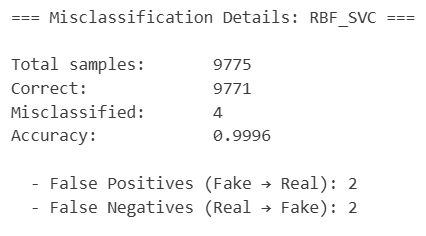
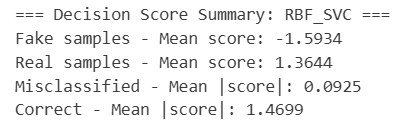

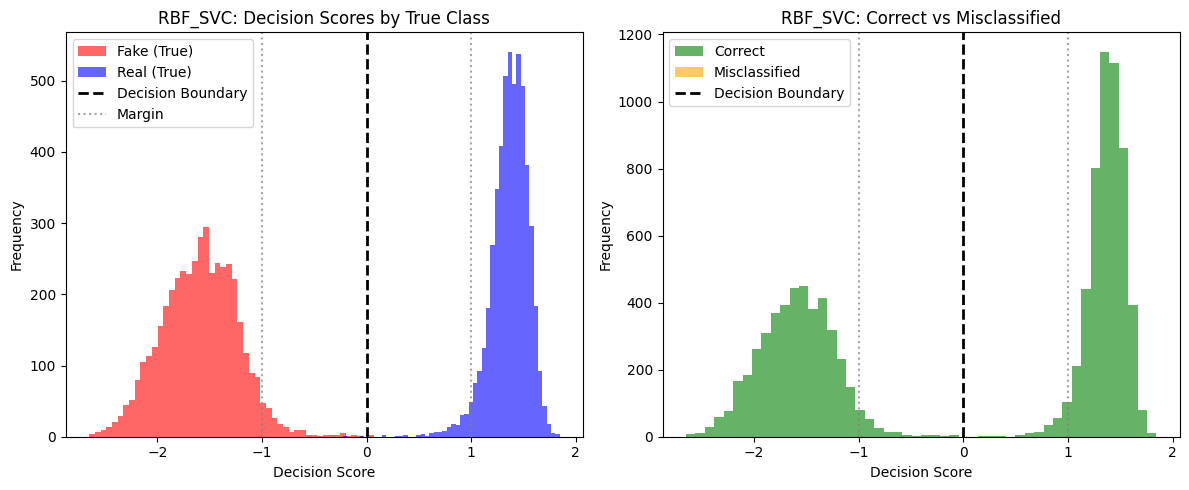

## Model Evaluation
#### **Computational Costs**
The three SVM variants show very different computational profiles despite having almost identical predictive performance. The linear SVM is by far the most efficient, with training and hyperparameter optimization times an order of magnitude lower than both the polynomial and RBF models, and essentially negligible inference time per batch. In contrast, the polynomial SVM is the slowest in both training and optimization, followed by the RBF SVM, which makes these non‑linear kernels substantially more expensive to use in practice for only marginal accuracy gains.  
  

![Computational comparizon.png](<attachment:Computational comparizon.png>)

#### **Confusion Matrix**
All three confusion matrices indicate that misclassifications are extremely rare, with almost all fake articles correctly identified as fake and almost all real articles correctly identified as real. The linear SVM makes a small number of errors in both classes, the RBF SVM reduces this further, and the polynomial SVM achieves a perfect split on the test set with zero misclassified samples, confirming that the dataset is almost perfectly separable after cleaning and feature engineering.

The performance metrics are close to perfect across models: the linear SVM reaches a test accuracy of 0.9989 with a misclassification error of 0.0011 and an F1‑score of 0.9990, the RBF SVM improves this slightly to 0.9996 accuracy and 0.0004 error, and the polynomial SVM attains 1.0000 accuracy with zero observed misclassification and an F1‑score of 1.0. Given that these differences are numerically small, the results suggest that from a practical standpoint the linear SVM offers the best trade‑off between accuracy and efficiency, while the marginal gains of more complex kernels likely reflect residual dataset idiosyncrasies rather than fundamentally superior modelling capacity.

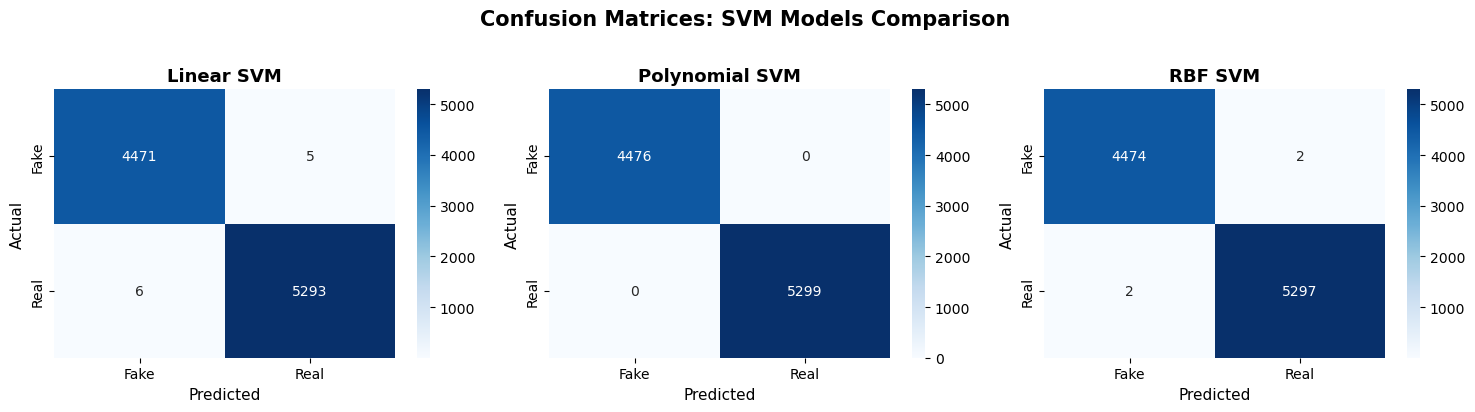
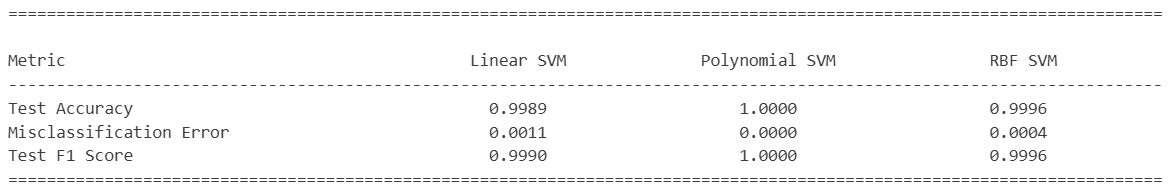



**Linear SVM**: 
- TF–IDF vectors are already high‑dimensional and **nearly linearly separable**, so a linear kernel suffices.

- Achieved **near‑strongest results** on core metrics while requiring the **least training time**.​​

- Misclassifications lie **close to the separating hyperplane**, indicating that mistakes are genuinely ambiguous cases rather than systematic failures on a specific subtype of article.​​ Further discussed in the following section. 

**Polynomial SVM**:
- Resulted in the **strongest accuracy score** by a small margin but required more **computational power** during hyperparameter search.

- Higher‑degree polynomials tended to overfit, tightening the margin around training examples without delivering consistent gains on the test set, which aligns with prior work reporting **minimal advantages of polynomial kernels** for TF–IDF text.

**RBF SVM**:
- Provided **trivial improvement in accuracy** and **no improvement in F1 score** compared to the linear model.​​

- Training and hyperparameter search were noticeably **more computationally expensive**, and misclassification plots show that most errors still occur near the boundary, suggesting that additional non‑linearity does not uncover a radically different structure in the data.
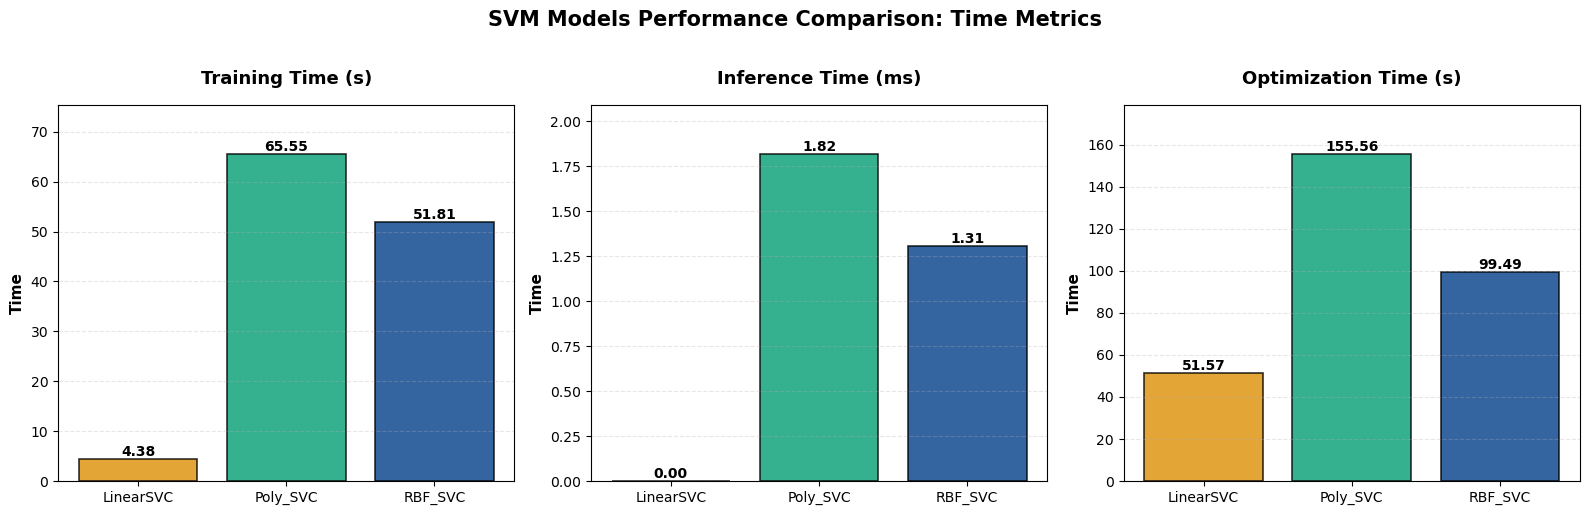

### Feature Analysis

To interpret the Linear SVM's predictions, **SHAP framework** was employed. It assigns each feature an importance value (SHAP value) that represents its contribution to moving the prediction away from the base value toward the final output. 

**SHAP was used to**: 

- **Model transparency**: Exploring beyond black-box prediction to understand why the model classifies an article as fake or real, revealing whether it relies on legitimate linguistic patterns or spurious correlations. Determining which words, phrases, and engineered features (sentiment, emotion, capitalization) influence predictions most strongly.

- **Analyze boundary cases**: Examining samples close to the decision boundary (low confidence predictions) to understand what makes certain articles difficult to classify.

- **Validation**: Confirming that the model uses meaningful features rather than exploiting dataset artifacts or leakage patterns.  
  
  
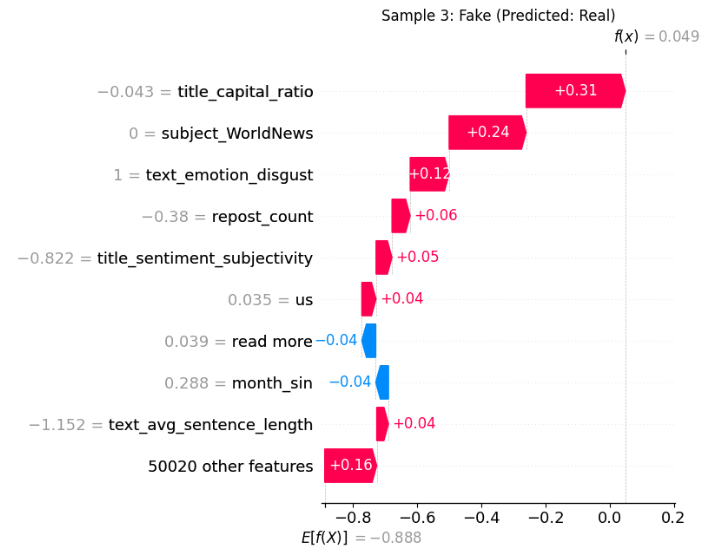
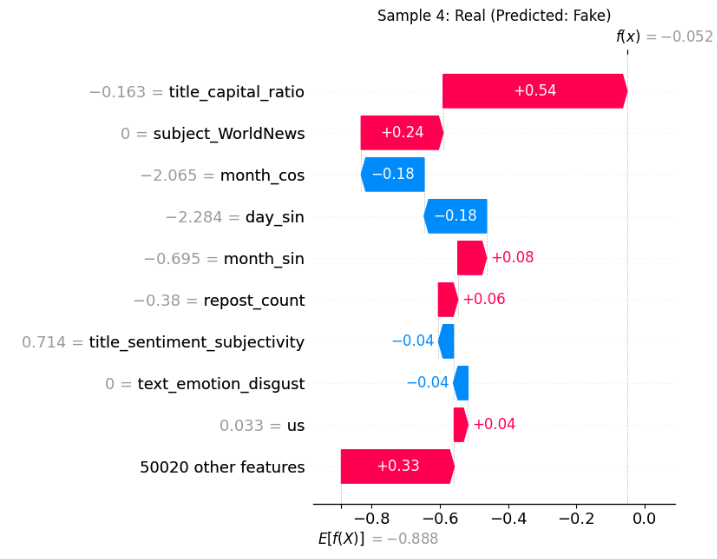

## Conclusion

This project built and evaluated three SVM models, linear, polynomial, and RBF for classifying fake vs real news.​​ 
Data exploration revealed some problematic areas in data leakage, duplicate values and other issues that might potentially hinder the model's performance.​​ After the data cleaning, processing and feature engineering, the models relied more on genuine linguistic patterns rather than memorized cues.​​

The model performance evaluation showed that the linear model completes training and tuning substantially faster than the polynomial and RBF models while reaching comparable test performance, which corroborates findings in the literature that linear SVMs are often the best trade‑off for large, sparse text features.

Project results support the initial hypothesis. Once data leakage is removed and strong lexical features are used, a well‑tuned linear SVM is sufficient for fake‑news detection. More complex kernels mainly increase training time and tuning complexity, with insignificant gains in generalisation, which is consistent with external benchmark studies showing that TF–IDF and linear SVM often matches or outperforms more complex kernel choices in fake‑news classification tasks.

  
  
## References

<span style="color:gray; font-style:italic"> ["A benchmark study of machine learning models for online fake news detection", Khan J.Y., Khondaker T.I., et al., Machine Learning with Applications, 2021](https://www.sciencedirect.com/science/article/pii/S266682702100013X)</span>  
  
<span style="color:gray; font-style:italic">["Survey of fake news detection using machine intelligence approach", Pal A, Pranav, Prahdan M, Data & Knowledge Engineering, 2023](https://www.sciencedirect.com/science/article/abs/pii/S0169023X22001094)</span>  
  
<span style="color:gray; font-style:italic">["Fake and Real News Dataset", Clément Bisaillon, Kaggle, 2023](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data)</span>  
  
<span style="color:gray; font-style:italic">["Advanced machine learning techniques for fake news detection", Jahan I., Hasan N., Islam S.N., et al., Magna Scientia Advanced Research and Reviews, 2024](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://magnascientiapub.com/journals/msarr/sites/default/files/MSARR-2024-0198.pdf)</span>  
